## import os 

In [1]:
import os
os.listdir()

['second_model.ipynb',
 'data',
 'train.csv',
 'DataCleaning.ipynb',
 'EDA.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'LSTM.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'three_model.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

# load

In [3]:
df = pd.read_csv('./data/train_FeatureSelected(2016~2017).csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(52704, 38)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B10,MLPAP_TI-0706B14,MLPAP_TI-0706B16,MLPAP_TI-0706B18,MLPAP_TI-0706B19,...,MLPAP_FR-0632.PV,MLPAP_TIC-0757A.PV,MLPAP_TRC-0762.PV,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target,target_over_range
2016-05-09 00:00:00,399.996956,401.962157,402.245915,401.143639,400.998932,402.001481,402.997679,402.048413,401.047635,402.998548,...,-0.001134,399.694655,401.207034,4.050917,4.045456,6.484379,1.635430,0.050999,5.428077,1.0
2016-05-09 00:10:00,399.996956,401.939352,402.245915,401.004025,400.998932,402.001481,403.098684,402.003686,401.047635,402.998548,...,-0.001134,399.694655,401.089849,4.157893,4.152288,6.449854,1.624784,0.050999,5.428077,1.0
2016-05-09 00:20:00,399.996956,401.905143,402.104563,401.004025,400.998932,402.001481,402.997679,402.003686,401.004128,402.998548,...,-0.001134,399.739510,401.060553,4.207893,4.202220,6.440330,1.649624,0.050999,5.428077,1.0
2016-05-09 00:30:00,399.996956,401.950754,402.304812,401.004025,400.998932,402.001481,403.098684,402.003686,401.102020,402.998548,...,-0.001134,399.795577,401.470701,4.152079,4.146482,6.464140,1.635430,0.050999,5.428077,1.0
2016-05-09 00:40:00,399.996956,401.996366,402.175239,401.004025,400.998932,402.001481,403.098684,402.003686,401.145528,402.998548,...,-0.001134,399.795577,401.460935,4.016615,4.011200,6.415329,1.653172,0.050999,5.428077,1.0


# LOAD SPEC

In [4]:
tag_sheet = pd.read_excel('tag盤點表.xlsx')
spec = tag_sheet[tag_sheet['TAG'].isin(df.columns.tolist())][['TAG','min','max']]
spec = spec.set_index('TAG')
spec.loc['DATA OF USE','min'] = 0
spec.loc['DATA OF USE','max'] = np.inf
spec

,min,max
TAG,,
MLPAP_FR-0632.PV,30,90
MLPAP_TIC-0757A.PV,345,365
MLPAP_TRC-0762.PV,345,365
MLPAP_TI-0706A01,340,450
MLPAP_TI-0706D01,340,450
MLPAP_TI-0706E01,340,450
MLPAP_TI-0716E01,340,450
MLPAP_FR-0755.PV,0,25
MLPAP_FR-0791.PV,10,35


# OVER RANGE COUNT

In [5]:
def check_spec(df,spec):
    df_col = list(df.columns)
    spec_col = list(spec.index)
    intersection = set(df_col) & set(spec_col)
    df['over_range_num'] = 0
    for col in tqdm(list(intersection)):
        lb, ub = spec.loc[col,'min'], spec.loc[col,'max']
        over_range = (df[col]<lb)|(df[col]>ub)
        df.loc[over_range,'over_range_num'] += 1
    return df

In [6]:
df = check_spec(df,spec)

/workspace/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


(array([4.660e+04, 1.509e+03, 3.580e+02, 4.000e+00, 9.000e+00, 1.600e+01,
        6.000e+00, 6.000e+00, 1.000e+01, 4.186e+03]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

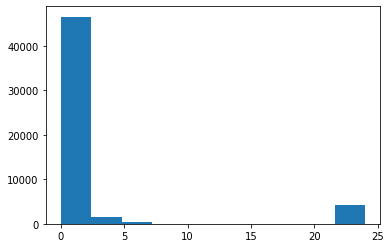

In [7]:
plt.hist(df['over_range_num'])

# scale data

In [8]:
from sklearn.preprocessing import MinMaxScaler

x_col = df.drop(['target','target_over_range','over_range_num'],axis=1).columns.tolist()
y_col = 'target'

mm = MinMaxScaler()
df[x_col] = mm.fit_transform(df[x_col])

print(df.shape)
df.head()

(52704, 39)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B10,MLPAP_TI-0706B14,MLPAP_TI-0706B16,MLPAP_TI-0706B18,MLPAP_TI-0706B19,...,MLPAP_TIC-0757A.PV,MLPAP_TRC-0762.PV,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target,target_over_range,over_range_num
2016-05-09 00:00:00,0.929761,0.928483,0.902284,0.918713,0.927523,0.983527,0.984021,0.985352,0.984122,0.986233,...,0.986807,0.981417,0.131957,0.131957,0.015033,0.861312,0.137096,5.428077,1.0,6
2016-05-09 00:10:00,0.929761,0.928424,0.902284,0.918355,0.927523,0.983527,0.984298,0.985229,0.984122,0.986233,...,0.986807,0.981098,0.136827,0.136827,0.013892,0.861134,0.137096,5.428077,1.0,6
2016-05-09 00:20:00,0.929761,0.928335,0.901928,0.918355,0.927523,0.983527,0.984021,0.985229,0.984002,0.986233,...,0.986928,0.981018,0.139103,0.139103,0.013577,0.861548,0.137096,5.428077,1.0,6
2016-05-09 00:30:00,0.929761,0.928453,0.902433,0.918355,0.927523,0.983527,0.984298,0.985229,0.984272,0.986233,...,0.987079,0.982133,0.136562,0.136562,0.014364,0.861312,0.137096,5.428077,1.0,6
2016-05-09 00:40:00,0.929761,0.928571,0.902106,0.918355,0.927523,0.983527,0.984298,0.985229,0.984391,0.986233,...,0.987079,0.982107,0.130396,0.130396,0.012751,0.861608,0.137096,5.428077,1.0,6


# stack time_step

In [9]:
def train_windows(df, ref_day=6*6, predict_day=1):
    X_train, Y_train, i_lst = [], [], []
    for i in tqdm(range(df.shape[0]-predict_day-ref_day)):
        # C1 目標值在正常範圍
        C1 = (df.iloc[i+ref_day:i+ref_day+predict_day]['target_over_range'][0] == 0)
        # C2 特徵值皆在正常範圍
        C2 = (df.iloc[i:i+ref_day+predict_day]['over_range_num'].mean() == 0)
        # 如果條件成立 才製作一組 (X,y)pair
        if C1&C2: 
            X_train.append(np.array(df.iloc[i:i+ref_day][x_col]))
            Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day][y_col]))
            i_lst.append(df.iloc[i+ref_day:i+ref_day+predict_day].index[0])
    # 重整格式
    X_train = np.array(X_train)
    Y_train = pd.Series(np.array(Y_train).ravel(),index=i_lst,name='y')
    return X_train, Y_train

In [10]:
X, y = train_windows(df, ref_day=36, predict_day=1)
print(X.shape,y.shape)

/workspace/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



(35045, 36, 36) (35045,)


# Visualization

(36, 36)


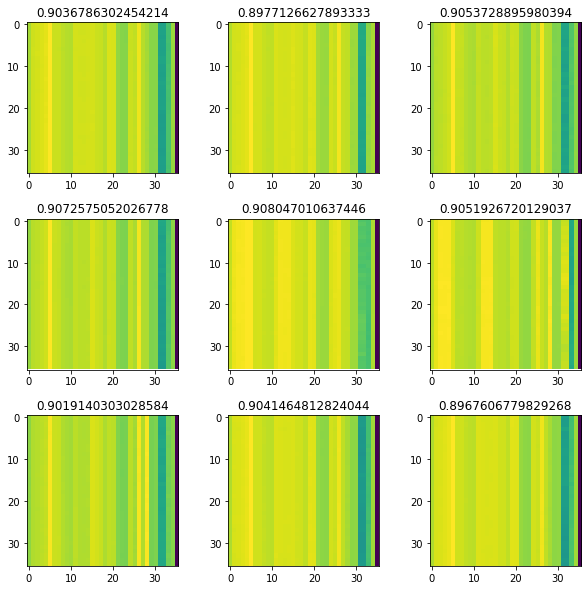

In [11]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
print(X[0].shape)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    idx = np.random.randint(0,len(X))
    plt.imshow(X[idx])
    plt.title(y[idx])

# reshape

In [12]:
X = X.reshape(-1,X[0].shape[0],X[0].shape[1],1)
print(X.shape,y.shape)

(35045, 36, 36, 1) (35045,)


# split

In [13]:
train_len = int(len(X)*0.8)
X_train,X_val_test = X[:train_len],X[train_len:]
y_train,y_val_test = y[:train_len],y[train_len:]

val_len = int(len(X_val_test)*0.5)
X_val,X_test = X_val_test[:val_len],X_val_test[val_len:]
y_val,y_test = y_val_test[:val_len],y_val_test[val_len:]

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(28036, 36, 36, 1) (28036,)
(3504, 36, 36, 1) (3504,)
(3505, 36, 36, 1) (3505,)


# Model

In [14]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam
import warnings;warnings.simplefilter('ignore')

Using TensorFlow backend.
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/d

In [15]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=X[0].shape))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 36, 36, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               295040    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [16]:
model.compile(optimizer=Adam(lr=0.0001), loss="mse", metrics=["mse"])

In [17]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=10,mode='min')

# fit

In [18]:
history = model.fit(X_train,y_train,
                    batch_size = 256,
                    epochs = 15,
                    validation_data = (X_val,y_val),
                    verbose = 1,
                    callbacks = [es])

Train on 28036 samples, validate on 3504 samples
Epoch 1/15
28036/28036 [==============================] - 4s 138us/step - loss: 0.1237 - mean_squared_error: 0.1237 - val_loss: 3.9293e-04 - val_mean_squared_error: 3.9293e-04
Epoch 2/15
28036/28036 [==============================] - 1s 22us/step - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 2.7542e-04 - val_mean_squared_error: 2.7542e-04
Epoch 3/15
28036/28036 [==============================] - 1s 23us/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 2.0806e-04 - val_mean_squared_error: 2.0806e-04
Epoch 4/15
28036/28036 [==============================] - 1s 23us/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 1.7089e-04 - val_mean_squared_error: 1.7089e-04
Epoch 5/15
28036/28036 [==============================] - 1s 23us/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 2.5831e-04 - val_mean_squared_error: 2.5831e-04
Epoch 6/15
28036/28036 [==============================] - 1s 23us/step - lo

# eval

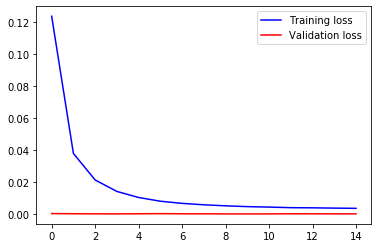

In [19]:
n = 0
plt.plot(history.history['loss'][n:], color='b', label="Training loss")
plt.plot(history.history['val_loss'][n:], color='r', label="Validation loss")
plt.legend()

In [20]:
import gc 
gc.collect()

7194

# plot predict line

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metric(y_true,y_pred,name):
    t = pd.DataFrame(index=[name])
    t['r2'] = r2_score(y_true,y_pred)
    t['rmse'] = sqrt(mean_squared_error(y_true,y_pred))
    t['mape'] = mape(y_true,y_pred)
    t = t.apply(lambda x:round(x,4))
    return t

def plot_predict(y_true,y_pred,name):
    # sort index
    y_pred = y_pred.sort_index()
    y_true = y_true.sort_index()
    # plot
    plot_data = pd.concat([y_pred,y_true],axis=1)
    n = int(len(y_pred)/200)
    plot_data.rolling(n).mean().plot()
    plt.title('move_avg {}'.format(n))
    plt.show()
    # score
    print(metric(y_true,y_pred,name))

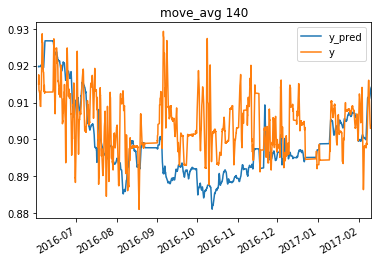

           r2    rmse    mape
train -0.5446  0.0142  1.4157


In [30]:
y_pred = model.predict(X_train).ravel()
y_pred = pd.DataFrame(y_pred,index=y_train.index,columns=['y_pred'])
plot_predict(y_train,y_pred,'train')

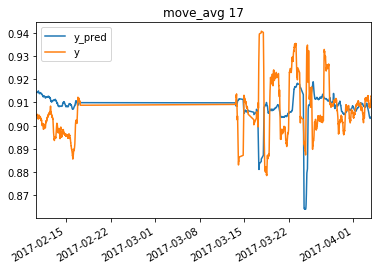

         r2    rmse    mape
val -0.3519  0.0142  1.2403


In [31]:
y_pred = model.predict(X_val).ravel()
y_pred = pd.DataFrame(y_pred,index=y_val.index,columns=['y_pred'])
plot_predict(y_val,y_pred,'val')

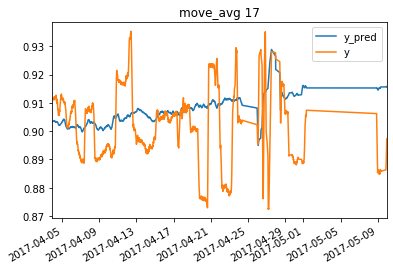

          r2    rmse    mape
test -0.3413  0.0157  1.3567


In [32]:
y_pred = model.predict(X_test).ravel()
y_pred = pd.DataFrame(y_pred,index=y_test.index,columns=['y_pred'])
plot_predict(y_test,y_pred,'test')